In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('DF.csv')

In [2]:
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,Marc Valiente,Marc Valiente Hernández,69,69,375000,CB,CB,Spain,https://cdn.sofifa.net/players/188/844/23_60.png,35,...,56,61,56,66,69,66,67,69,67,20
1,M. Fall,Mourtada Fall,69,69,450000,CB,CB,Senegal,https://cdn.sofifa.net/players/248/295/23_60.png,34,...,52,56,52,61,65,61,63,69,63,18
2,F. Pogba,Florentin Pogba,69,69,950000,CB,CB,Guinea,https://cdn.sofifa.net/players/198/688/23_60.png,31,...,56,58,56,66,67,66,67,69,67,17
3,Odei,Odei Onaindia Zabala,68,68,775000,CB,CB,Spain,https://cdn.sofifa.net/players/251/644/23_60.png,32,...,51,55,51,65,67,65,67,68,67,16
4,M. Lešković,Marko Lešković,68,68,825000,CB,CB,Croatia,https://cdn.sofifa.net/players/241/672/23_60.png,31,...,44,46,44,58,60,58,62,68,62,19


In [4]:
len(df)

109

In [5]:
duplicate_rows = df[df.duplicated()]
df.drop_duplicates(inplace=True)
missing_values = df.isnull().sum()
df.dropna(inplace=True)

len(df)

109

In [6]:
X = df[['Potential','Pace Total','Defending Total','Physicality Total','Heading Accuracy','Short Passing','Reactions','Jumping','Stamina','Strength','Aggression','Interceptions','Marking','Standing Tackle','Sliding Tackle','LWB Rating','CDM Rating','RWB Rating','LB Rating','CB Rating','RB Rating']]

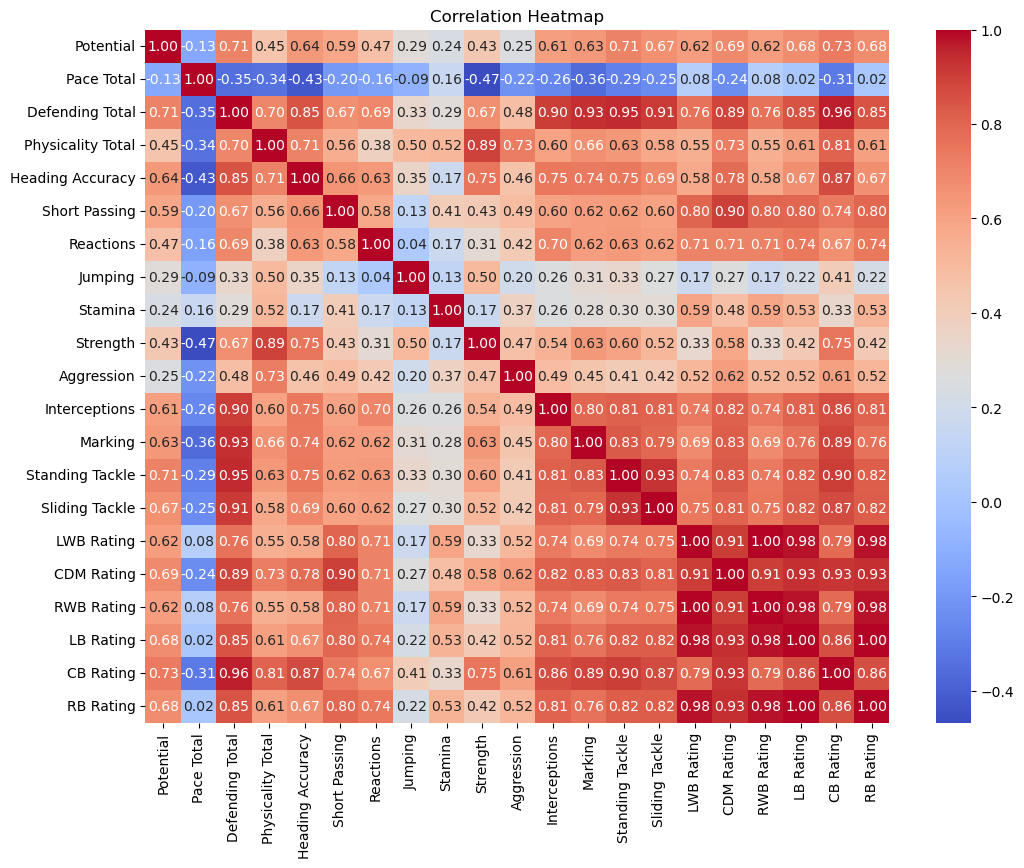

In [7]:
correlation_matrix = X.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# RandomForest

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define features (X) and target variable (y)
X = df[['Potential','Pace Total','Defending Total','Physicality Total','Heading Accuracy','Short Passing','Reactions','Jumping','Stamina','Strength','Aggression','Interceptions','Marking','Standing Tackle','Sliding Tackle','LWB Rating','CDM Rating','RWB Rating','LB Rating','CB Rating','RB Rating']]
y = df['Overall']  # Target variable

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Random Forest Regression as an example)
model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print("All predicted values:")
print(y_pred)

All predicted values:
[52.75 64.86 67.35 53.21 55.03 54.32 58.1  55.65 51.02 66.46 53.09 52.73
 68.19 53.04 64.21 54.   56.25 54.2  49.89 57.83 64.4  57.77]


In [9]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.4070772727272717
R-squared: 0.9874121262458472


In [10]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As                    Marc Valiente
Full Name         Marc Valiente Hernández
Overall                                69
Potential                              69
Value(in Euro)                     375000
                           ...           
RWB Rating                             66
LB Rating                              67
CB Rating                              69
RB Rating                              67
GK Rating                              20
Name: 0, Length: 89, dtype: object


In [11]:
y_pred = model.predict(X_test)

# Find the index of the lowest predicted overall value
lowest_index = y_pred.argmin()

# Retrieve the details of the player with the lowest predicted overall value
lowest_player_details = df.iloc[X_test.index[lowest_index]]

# Print details of the player with the lowest predicted overall value
print("Details of the player with the lowest predicted overall value:")
print(lowest_player_details)

Details of the player with the lowest predicted overall value:
Known As              N. Prabhu
Full Name         Nikhil Prabhu
Overall                      49
Potential                    60
Value(in Euro)           100000
                      ...      
RWB Rating                   44
LB Rating                    46
CB Rating                    51
RB Rating                    46
GK Rating                    15
Name: 107, Length: 89, dtype: object


In [12]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Find the index of the highest predicted overall value among Indian players
    highest_indian_index = indian_players_predictions.argmax()

    # Retrieve the index of the player with the highest predicted overall value among Indian players
    index_in_indian_players = indian_players_indices[highest_indian_index]

    # Retrieve the details of the Indian player with the highest predicted overall value
    highest_indian_player_details = df.iloc[index_in_indian_players]

    # Print details of the Indian player with the highest predicted overall value
    print("Details of the Indian player with the highest predicted overall value:")
    print(highest_indian_player_details)
else:
    print("No Indian players in the test set.")


Details of the Indian player with the highest predicted overall value:
Known As                    C. Singh
Full Name         Chinglensana Singh
Overall                           60
Potential                         65
Value(in Euro)                325000
                         ...        
RWB Rating                        56
LB Rating                         57
CB Rating                         62
RB Rating                         57
GK Rating                         16
Name: 26, Length: 89, dtype: object


In [50]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:5]

    # Retrieve the indices of the top five players among Indian players
    top_five_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top five Indian players with the highest predicted overall value
    top_five_indian_players = df.iloc[top_five_indices]

    # Print details of the top five Indian players with the highest predicted overall value
    print("Details of the top five Indian players with the highest predicted overall value:")
    print(top_five_indian_players)
else:
    print("No Indian players in the test set.")


Details of the top five Indian players with the highest predicted overall value:
       Known As             Full Name  Overall  Potential  Value(in Euro)  \
26     C. Singh    Chinglensana Singh       60         65          325000   
36  L. Renthlei  Laldinliana Renthlei       58         63          275000   
37      A. Khan             Adil Khan       58         58          100000   
33    P. Halder         Pronay Halder       58         58          170000   
27    A. Mishra          Akash Mishra       60         69          525000   

   Positions Played Best Position Nationality  \
26               CB            CB       India   
36               RB            RB       India   
37           CB,CDM            CB       India   
33           CDM,CM            CB       India   
27               LB           LWB       India   

                                          Image Link  Age  ...  LM Rating  \
26  https://cdn.sofifa.net/players/234/508/23_60.png   25  ...         48   
36  htt

# LinearRegression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming 'X' contains the features and 'y' contains the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_reg.predict(X_test)

print("All predicted values:")
print(y_pred)

All predicted values:
[52.3494394  66.95131378 67.37999181 54.90484687 52.95430449 55.0122932
 57.660142   55.46146752 52.20256218 64.59643863 53.21871719 53.20344744
 70.65036265 52.81124419 65.54251303 54.4869338  56.52461703 54.23720164
 47.68549119 57.33730906 65.89663176 58.70618568]


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# To print coefficients and intercept
print("Coefficients:", linear_reg.coef_)
print("Intercept:", linear_reg.intercept_)

Mean Squared Error: 1.2151148994606134
R-squared: 0.9624255295592297
Coefficients: [ 0.00646396 -0.02568241 -0.12849405 -0.56983943  0.06330279  0.05614683
  0.00251785  0.0238642   0.1349831   0.30256654  0.17398458  0.05457116
  0.17787728  0.28262456 -0.03718325 -0.23183661 -0.06815541 -0.23183661
  0.63308532 -0.26179938  0.63308532]
Intercept: 2.3240365164059895


In [15]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As                    Marc Valiente
Full Name         Marc Valiente Hernández
Overall                                69
Potential                              69
Value(in Euro)                     375000
                           ...           
RWB Rating                             66
LB Rating                              67
CB Rating                              69
RB Rating                              67
GK Rating                              20
Name: 0, Length: 89, dtype: object


In [16]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:5]

    # Retrieve the indices of the top five players among Indian players
    top_five_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top five Indian players with the highest predicted overall value
    top_five_indian_players = df.iloc[top_five_indices]

    # Print details of the top five Indian players with the highest predicted overall value
    print("Details of the top five Indian players with the highest predicted overall value:")
    print(top_five_indian_players)
else:
    print("No Indian players in the test set.")


Details of the top five Indian players with the highest predicted overall value:
       Known As             Full Name  Overall  Potential  Value(in Euro)  \
37      A. Khan             Adil Khan       58         58          100000   
26     C. Singh    Chinglensana Singh       60         65          325000   
36  L. Renthlei  Laldinliana Renthlei       58         63          275000   
33    P. Halder         Pronay Halder       58         58          170000   
27    A. Mishra          Akash Mishra       60         69          525000   

   Positions Played Best Position Nationality  \
37           CB,CDM            CB       India   
26               CB            CB       India   
36               RB            RB       India   
33           CDM,CM            CB       India   
27               LB           LWB       India   

                                          Image Link  Age  ...  LM Rating  \
37  https://cdn.sofifa.net/players/248/306/23_60.png   33  ...         52   
26  htt

# DecisionTree

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# Assuming 'X' contains the features and 'y' contains the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree regressor model
tree_reg = DecisionTreeRegressor()

# Fit the model to the training data
tree_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_reg.predict(X_test)

# Print all predicted values
print("All predicted values:")
print(y_pred)


All predicted values:
[53. 65. 65. 54. 55. 55. 59. 56. 51. 68. 54. 54. 69. 53. 65. 54. 57. 54.
 47. 55. 65. 57.]


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# To print coefficients and intercept
print("Coefficients:", linear_reg.coef_)
print("Intercept:", linear_reg.intercept_)

Mean Squared Error: 1.6818181818181819
R-squared: 0.9479938665985177
Coefficients: [ 0.00646396 -0.02568241 -0.12849405 -0.56983943  0.06330279  0.05614683
  0.00251785  0.0238642   0.1349831   0.30256654  0.17398458  0.05457116
  0.17787728  0.28262456 -0.03718325 -0.23183661 -0.06815541 -0.23183661
  0.63308532 -0.26179938  0.63308532]
Intercept: 2.3240365164059895


In [19]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As                    Marc Valiente
Full Name         Marc Valiente Hernández
Overall                                69
Potential                              69
Value(in Euro)                     375000
                           ...           
RWB Rating                             66
LB Rating                              67
CB Rating                              69
RB Rating                              67
GK Rating                              20
Name: 0, Length: 89, dtype: object


In [20]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:5]

    # Retrieve the indices of the top five players among Indian players
    top_five_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top five Indian players with the highest predicted overall value
    top_five_indian_players = df.iloc[top_five_indices]

    # Print details of the top five Indian players with the highest predicted overall value
    print("Details of the top five Indian players with the highest predicted overall value:")
    print(top_five_indian_players)
else:
    print("No Indian players in the test set.")


Details of the top five Indian players with the highest predicted overall value:
     Known As           Full Name  Overall  Potential  Value(in Euro)  \
26   C. Singh  Chinglensana Singh       60         65          325000   
33  P. Halder       Pronay Halder       58         58          170000   
37    A. Khan           Adil Khan       58         58          100000   
27  A. Mishra        Akash Mishra       60         69          525000   
24    S. Bose      Subhasish Bose       61         62          350000   

   Positions Played Best Position Nationality  \
26               CB            CB       India   
33           CDM,CM            CB       India   
37           CB,CDM            CB       India   
27               LB           LWB       India   
24            LB,LM            LB       India   

                                          Image Link  Age  ...  LM Rating  \
26  https://cdn.sofifa.net/players/234/508/23_60.png   25  ...         48   
33  https://cdn.sofifa.net/play

# Support Vector Regression

In [21]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Assuming 'X' contains the features and 'y' contains the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine for Regression (SVR) model
svm_reg = SVR(kernel='rbf')  # 'rbf' kernel is often used for non-linear relationships

# Fit the model to the training data
svm_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_reg.predict(X_test)

# Print all predicted values
print("All predicted values:")
print(y_pred)


All predicted values:
[53.57996657 64.7013557  64.08612808 53.50521348 55.45028882 55.35156443
 57.4357689  55.12097609 51.42256516 64.57819472 53.58173532 53.4243753
 64.55638174 53.05968342 64.11194401 53.91786757 56.61588053 54.50622047
 52.04839788 57.62109138 64.07423839 57.5464441 ]


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 2.529780746013233
R-squared: 0.9217726884059286


In [23]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As            J. Kauko
Full Name         Joni Kauko
Overall                   65
Potential                 65
Value(in Euro)        575000
                     ...    
RWB Rating                65
LB Rating                 65
CB Rating                 65
RB Rating                 65
GK Rating                 18
Name: 10, Length: 89, dtype: object


In [24]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:5]

    # Retrieve the indices of the top five players among Indian players
    top_five_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top five Indian players with the highest predicted overall value
    top_five_indian_players = df.iloc[top_five_indices]

    # Print details of the top five Indian players with the highest predicted overall value
    print("Details of the top five Indian players with the highest predicted overall value:")
    print(top_five_indian_players)
else:
    print("No Indian players in the test set.")


Details of the top five Indian players with the highest predicted overall value:
       Known As             Full Name  Overall  Potential  Value(in Euro)  \
36  L. Renthlei  Laldinliana Renthlei       58         63          275000   
37      A. Khan             Adil Khan       58         58          100000   
26     C. Singh    Chinglensana Singh       60         65          325000   
33    P. Halder         Pronay Halder       58         58          170000   
24      S. Bose        Subhasish Bose       61         62          350000   

   Positions Played Best Position Nationality  \
36               RB            RB       India   
37           CB,CDM            CB       India   
26               CB            CB       India   
33           CDM,CM            CB       India   
24            LB,LM            LB       India   

                                          Image Link  Age  ...  LM Rating  \
36  https://cdn.sofifa.net/players/248/274/23_60.png   23  ...         50   
37  htt

# K-Nearest Neighbors (KNN)

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Assuming 'X' contains the features and 'y' contains the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize the KNN regressor model (with, for instance, k=5 neighbors)
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_reg.predict(X_test)

# Print all predicted values
print("All predicted values:")
print(y_pred)


All predicted values:
[52.  53.8 52.2 53.  53.2 55.4 52.8 54.  55.  56.4 55.8 66.6 52.8 51.2
 55.8 53.  50.8 56.4 55.6 52.4 64.8 52.8]


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.0818181818181802
R-squared: 0.9012544100352804


In [27]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As                 F. Pogba
Full Name         Florentin Pogba
Overall                        69
Potential                      69
Value(in Euro)             950000
                       ...       
RWB Rating                     66
LB Rating                      67
CB Rating                      69
RB Rating                      67
GK Rating                      17
Name: 2, Length: 89, dtype: object


In [28]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:5]

    # Retrieve the indices of the top five players among Indian players
    top_five_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top five Indian players with the highest predicted overall value
    top_five_indian_players = df.iloc[top_five_indices]

    # Print details of the top five Indian players with the highest predicted overall value
    print("Details of the top five Indian players with the highest predicted overall value:")
    print(top_five_indian_players)
else:
    print("No Indian players in the test set.")


Details of the top five Indian players with the highest predicted overall value:
       Known As        Full Name  Overall  Potential  Value(in Euro)  \
31     R. Bheke      Rahul Bheke       59         59          150000   
38  J. Carneiro  Jessel Carneiro       58         58          150000   
32     J. Singh    Jeakson Singh       59         71          525000   
35       P. Das       Prabir Das       58         58          180000   
39    D. Tangri    Deepak Tangri       57         64          300000   

   Positions Played Best Position Nationality  \
31         CB,RB,LB            CB       India   
38               LB            LB       India   
32           CDM,CM            CB       India   
35            RB,RM            RB       India   
39           CDM,CB            CB       India   

                                          Image Link  Age  ...  LM Rating  \
31  https://cdn.sofifa.net/players/248/265/23_60.png   31  ...         54   
38  https://cdn.sofifa.net/players/25